In [1]:
%matplotlib inline

import pandas as pd
from scipy import stats  
from torch_rl.stats import RLTrainingStats
df_spiking = RLTrainingStats.load('/disk/users/vlasteli/no_backup/Projects/torch_rl/examples/training_stats_2018-02-02 17:39:30.889832/')


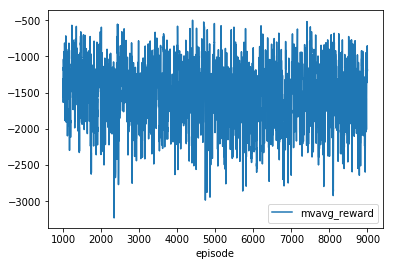

In [4]:
df_spiking[1000:9000].plot(y='mvavg_reward')

In [23]:
df = df_spiking.join(df_reservoir, rsuffix='_reservoir')

In [6]:
df1 = df_spiking[1000:9000]
df2 = df_spiking[3000:11000]

/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


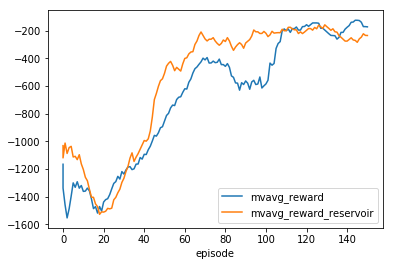

#  Mann-Whitney-Wilcoxon (MWW) RankSum test

The MWW RankSum test is a useful test to determine if two distributions are significantly different or not. Unlike the t-test, the RankSum test does not assume that the data are normally distributed, potentially providing a more accurate assessment of the data sets.

If P < 0.05 the distributions significantly differ.

In [8]:
z_stat, p_val = stats.ranksums(df1['mvavg_reward'], df2['mvavg_reward'])  
  
print("MWW RankSum P =", p_val)  

MWW RankSum P for treatments 1 and 2 = 0.0032747983550358733


# T-test

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores.

In [9]:
z_stat, p_val = stats.ttest_ind(df1['mvavg_reward'], df2['mvavg_reward'])  
  
print("T-test P =", p_val)  

T-test P = 0.010933181180549435
